# Dairy Goods Sales Analytics

## Introduction
The global dairy industry is a vital part of the fast-moving consumer goods (FMCG) sector, where efficiency in production, sales, and inventory management directly impacts profitability and customer satisfaction.  

This project uses the **Dairy Goods Sales dataset**, which contains detailed information on dairy farms, products, pricing, sales channels, customer locations, stock levels, and shelf life.  

The objective of this analysis is to uncover patterns in sales performance, evaluate pricing and revenue drivers, assess inventory and stock health, and identify potential wastage risks. By doing so, the project aims to provide actionable insights that can guide smarter decision-making in the dairy and FMCG supply chain. 

## Step 1: Ask

The business task is to analyze the Dairy Goods Sales dataset and answer key questions that can improve efficiency in sales, inventory, and supply chain management.  

The core business questions are:  

1. **Sales Performance** – Which products, brands, and sales channels are contributing the most to overall sales and revenue?  
2. **Inventory Optimization** – How can inventory be managed more effectively to avoid stockouts and overstocking?  
3. **Pricing & Revenue Drivers** – What is the relationship between pricing and sales performance across different products?  
4. **Shelf Life & Wastage Risks** – Which products are at risk of wastage due to short shelf life or slow sales velocity?  
5. **Actionable Insights** – What recommendations can improve efficiency in sales, pricing, and stock management?  


## Step 2: Prepare

**Data sources:** Single CSV file containing farm, product, pricing, sales, inventory, and shelf-life details.

**The main tasks are:**  
1. Load the data into Pandas.  
2. Check the shape and column names.  
3. Look at the first few rows.  
4. Check for missing values and data types.  
5. Convert date columns to proper datetime format.  
6. Make sure numeric columns are treated as numbers.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dairy-goods-sales-dataset/dairy_dataset.csv


In [2]:
#Step 1: Load the data into Pandas.
df = pd.read_csv("/kaggle/input/dairy-goods-sales-dataset/dairy_dataset.csv")

In [3]:
#Step 2: Check the shape and column names.
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)

Shape of dataset: (4325, 23)

Column names:
 Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')


In [4]:
#Step 3: Look at first rows
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [5]:
#Step 4: Check missing values
df.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [6]:
#Step 4: Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [7]:
#Step 5: Convert date columns to proper datetime format
date_columns = ["Date", "Production Date", "Expiration Date"]
for col in date_columns:
    if col in df.columns:
         df[col] = pd.to_datetime(df[col], errors="coerce")

In [8]:
#Step 6: Make sure numeric columns are treated as numbers & Re-check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

## Step 3: Process

In this step, I prepare the data for analysis by doing some basic cleaning and simple transformations.  
The main tasks are:  
1. Remove duplicate rows.  
2. Drop rows with too many missing values.  
3. Create a few useful columns (like days to expiry, stock gap).  
4. Keep a clean version of the dataset for analysis.  

In [9]:
# Step 1: Remove duplicate rows
before_dropping = df.shape[0]
df = df.drop_duplicates()
after_dropping = df.shape[0]
rows_removed = before_dropping - after_dropping
if rows_removed > 0:
    print(f"Duplicate rows: {rows_removed} duplicate rows found")
else:
    print(f"Duplicate rows: {rows_removed} - No duplicate rows found")

Duplicate rows: 0 - No duplicate rows found


In [10]:
#Step 2: Drop rows with too many missing values
before_row_drop = df.shape
df = df.dropna(thresh=len(df.columns) // 2)  # keeping rows with at least half the columns filled
after_row_drop = df.shape
if before_row_drop != after_row_drop:
    print("Changes made, rows deleted")
else: 
    print("Duplicate rows: 0 - No rows deleted")

Duplicate rows: 0 - No rows deleted


In [11]:
#Step 3: Create a few useful columns (eg. days to expiry, stock gap)

# Calculate shelf life from dates
if "Expiration Date" in df.columns and "Production Date" in df.columns:
    df["Shelf Life (calculated)"] = (df["Expiration Date"] - df["Production Date"]).dt.days

# Stock gap = how much stock above or below minimum
if "Quantity in Stock (liters/kg)" in df.columns and "Minimum Stock Threshold (liters/kg)" in df.columns:
    df["Stock Gap"] = df["Quantity in Stock (liters/kg)"] - df["Minimum Stock Threshold (liters/kg)"]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [12]:
# Step 4: Keep a clean version of the dataset for analysis

# Make a copy of the cleaned dataset
clean_df = df.copy()

In [13]:
#Checking the clean table
clean_df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Shelf Life (calculated),Stock Gap
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,25,195.45
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,22,85.83
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,30,231.90
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,72,147.50
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,11,-74.02


## Step 4: Analyse  

In this stage, the focus is on exploring the dataset to uncover key insights that can guide business decisions.  
The analysis will be structured around the following goals:

### 1. Understand Sales Performance  
- Identify top-selling products, brands, and sales channels.  
- Analyze sales trends over time (daily, monthly, seasonal).  

### 2. Optimize Inventory & Stock Management  
- Detect products at risk of stockouts or overstocking.   

### 3. Evaluate Pricing & Revenue Drivers  
- Study the effect of price per unit on quantity sold.  
- Identify high-margin vs low-margin products.

### 4. Assess Shelf Life & Wastage Risks  
- Compare product shelf life with actual sales velocity.  
- Highlight products likely to expire before being sold.   

### 4.1 Understand Sales Performance  
The first step in our analysis is to understand how products and brands are performing in terms of sales.  
This involves:  
- 4.1.1 Identifying top-selling products and brands.  
- 4.1.2 Checking which sales channels (Retail, Wholesale, Online) contribute the most.  
- 4.1.3 Looking at sales trends over time to detect patterns (daily, monthly, seasonal).  

These insights help identify the core revenue drivers and potential areas to expand sales efforts.

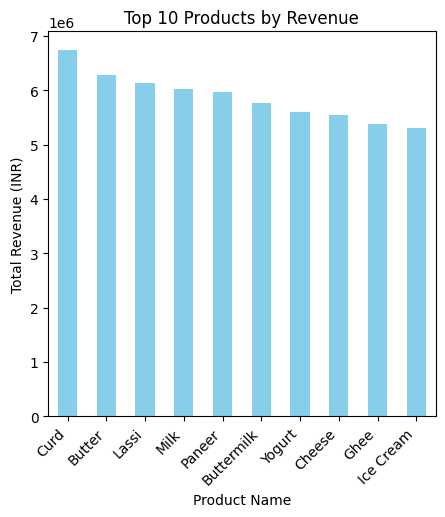

In [14]:
#4.1.1 Identifying top-selling products and brands.
#Top 10 Products by Revenue
top_products = clean_df.groupby("Product Name")["Approx. Total Revenue(INR)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(5,5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45, ha="right")
plt.show()

**Insights**: Curd, Butter, Lassi, and Milk are the top revenue-generating products, showing strong demand for staple dairy items.  
Value-added products like Paneer, Yogurt, Cheese, Ghee, and seasonal items like Ice Cream also perform well, highlighting opportunities for premium offerings and targeted promotions.

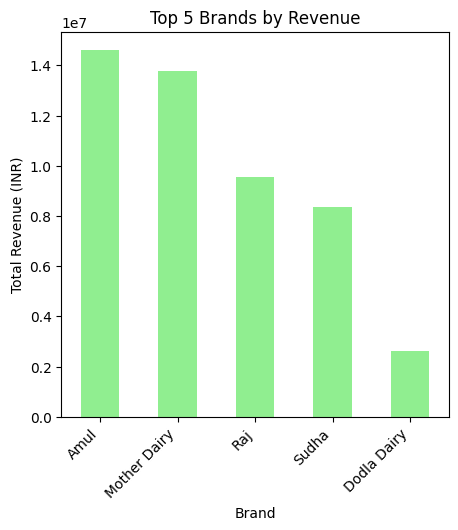

In [15]:
# Top 5 Brands by Revenue
top_brands = clean_df.groupby("Brand")["Approx. Total Revenue(INR)"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(5,5))
top_brands.plot(kind="bar", color="lightgreen")
plt.title("Top 5 Brands by Revenue")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45, ha="right")
plt.show()

**Insights**: Amul and Mother Dairy dominate revenue, showing strong brand preference among consumers. Raj and Sudha also perform well, while Dodla Dairy contributes less, indicating room for growth or targeted promotions.

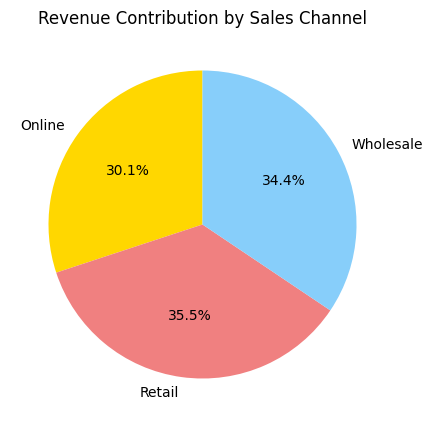

In [16]:
#4.1.2 Checking which sales channels (Retail, Wholesale, Online) contribute the most.
channel_revenue = clean_df.groupby("Sales Channel")["Approx. Total Revenue(INR)"].sum()

plt.figure(figsize=(5,5))
channel_revenue.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["gold","lightcoral","lightskyblue"])
plt.title("Revenue Contribution by Sales Channel")
plt.ylabel("")
plt.show()

**Insights**: Retail generates the highest revenue (₹20.86M), followed closely by Wholesale (₹20.21M) and Online (₹17.66M). This indicates that while traditional channels dominate, Online sales are significant and present growth opportunities.

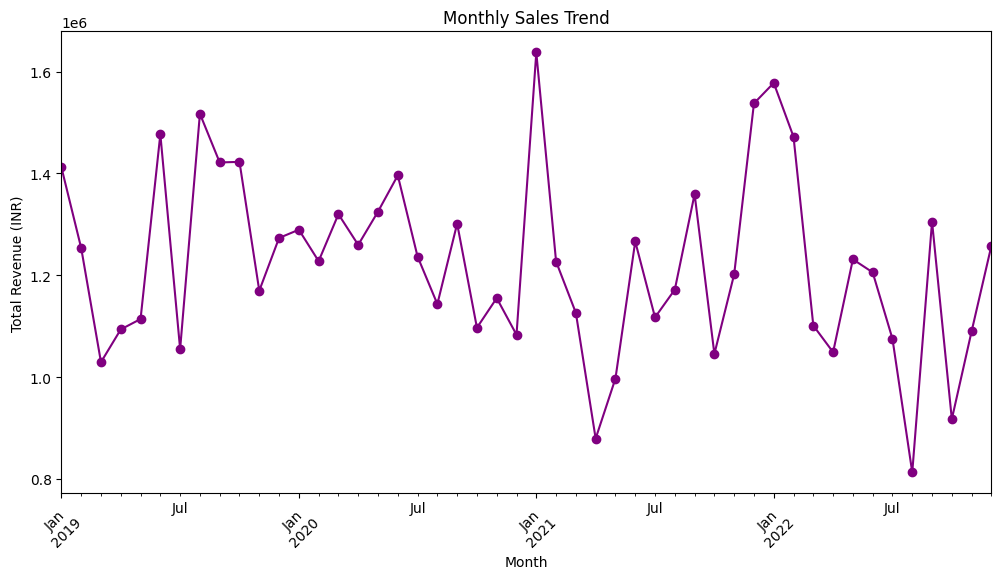

In [17]:
#4.1.3 Looking at sales trends over time to detect patterns (daily, monthly, seasonal).
monthly_sales = clean_df.groupby(clean_df["Date"].dt.to_period("M"))["Approx. Total Revenue(INR)"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o", color="purple")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Revenue (INR)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

**Insights**: Monthly sales show seasonal fluctuations, with revenue generally peaking at the start of the year and mid-year, and dipping in certain months like April and August. This indicates opportunities to plan promotions or production around low-revenue months and capitalize on high-demand periods.

### 4.2 Optimize Inventory & Stock Management  

This analysis aims to identify products that are at risk of stockouts or overstocking.  
Key metrics include current stock levels, minimum stock thresholds, and reorder quantities to maintain optimal inventory and minimize wastage.  

This involves: 

4.2.1 Identify products that are currently below minimum stock thresholds or have excess inventory, highlighting potential stock management issues.


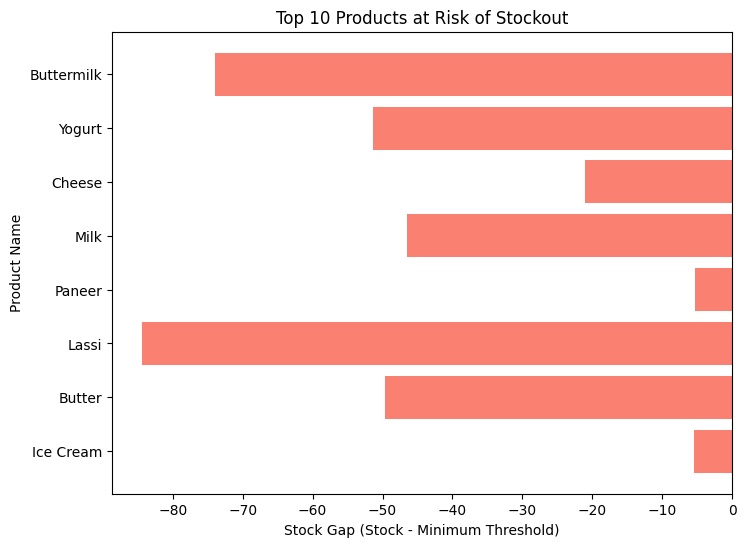

In [18]:
#4.2.1 Detect products at risk of stockouts or overstocking.
# Identify products below minimum stock threshold
low_stock = clean_df[clean_df["Quantity in Stock (liters/kg)"] < clean_df["Minimum Stock Threshold (liters/kg)"]]

# Visualize stock gaps
plt.figure(figsize=(8,6))
plt.barh(low_stock["Product Name"].head(10), low_stock["Stock Gap"].head(10), color="salmon")
plt.xlabel("Stock Gap (Stock - Minimum Threshold)")
plt.ylabel("Product Name")
plt.title("Top 10 Products at Risk of Stockout")
plt.gca().invert_yaxis()  # highest gap on top
plt.show()



**Insights**: Several products, including Buttermilk, Yogurt, Milk, Paneer, Lassi, Butter, and Ice Cream, are below their minimum stock thresholds, indicating a risk of stockouts. Prioritizing reorders for these items can help maintain inventory levels, prevent sales loss, and reduce potential disruptions in supply.

### 4.3 Evaluate Pricing & Revenue Drivers  

This analysis examines how product pricing influences sales quantity and overall revenue.  
It identifies high-margin versus low-margin products and breaks down revenue contributions by product, brand, and sales channel.  

This includes:
- 4.3.1 Study the effect of price per unit on quantity sold.
- 4.3.2 Identify high-margin vs low-margin products.

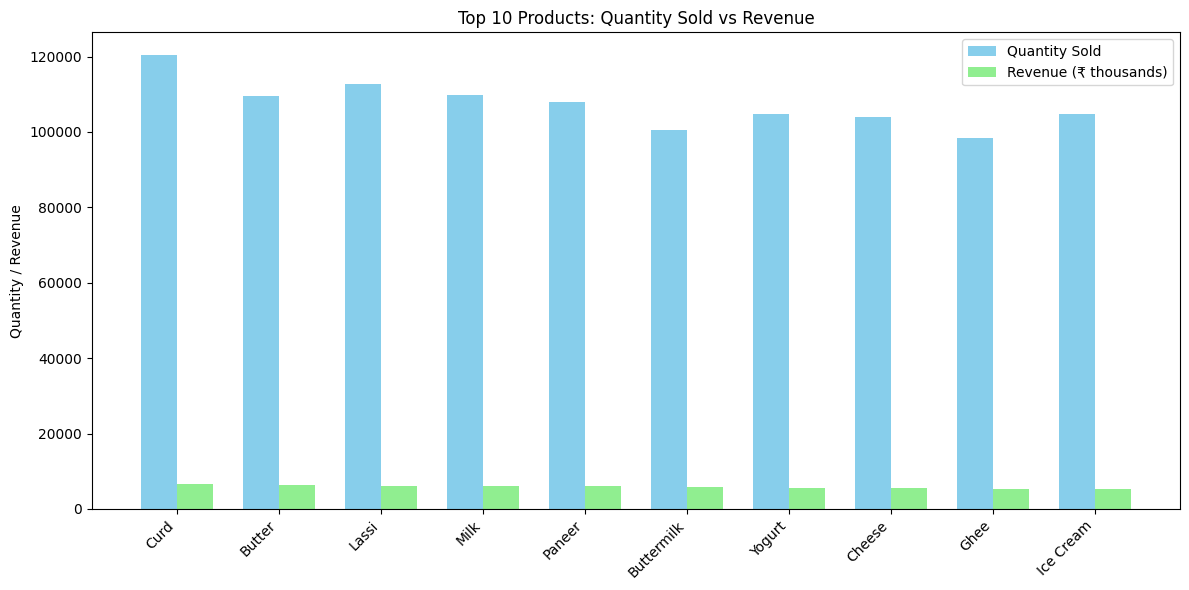

In [28]:
#4.3.1 Study the effect of price per unit on quantity sold.

# Top 10 products by revenue
price_summary = df.groupby("Product Name").agg({
    "Price per Unit (sold)": "mean",
    "Quantity Sold (liters/kg)": "sum",
    "Approx. Total Revenue(INR)": "sum"
}).sort_values(by="Approx. Total Revenue(INR)", ascending=False)


top_products = price_summary.head(10)

x = np.arange(len(top_products))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, top_products["Quantity Sold (liters/kg)"], width, 
        label="Quantity Sold", color="skyblue")
plt.bar(x + width/2, top_products["Approx. Total Revenue(INR)"]/1000, width, 
        label="Revenue (₹ thousands)", color="lightgreen")

plt.xticks(x, top_products.index, rotation=45, ha="right")
plt.ylabel("Quantity / Revenue")
plt.title("Top 10 Products: Quantity Sold vs Revenue")
plt.legend()
plt.tight_layout()
plt.show()

**Insights**: Staple dairy products like Curd, Butter, Lassi, and Milk generate the highest revenue, showing strong demand despite similar average prices. Premium or value-added products like Paneer, Yogurt, Cheese, Ghee, and Ice Cream also perform well, indicating opportunities for targeted promotions and higher-margin offerings.

<Figure size 500x500 with 0 Axes>

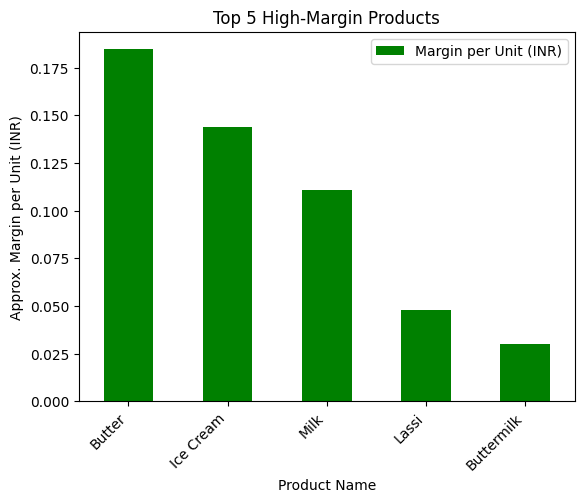

In [29]:
#4.3.2 Identify high-margin vs low-margin products.
# Top 5 High-Margin Products
df["Margin per Unit (INR)"] = df["Price per Unit (sold)"] - df["Price per Unit"]
product_margin = df.groupby("Product Name").agg({
    "Margin per Unit (INR)": "mean"
}).sort_values(by="Margin per Unit (INR)", ascending=False)
top_margin = product_margin.head(5)

plt.figure(figsize=(5,5))
top_margin.plot(kind="bar", color="green")
plt.title("Top 5 High-Margin Products")
plt.ylabel("Approx. Margin per Unit (INR)")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 500x500 with 0 Axes>

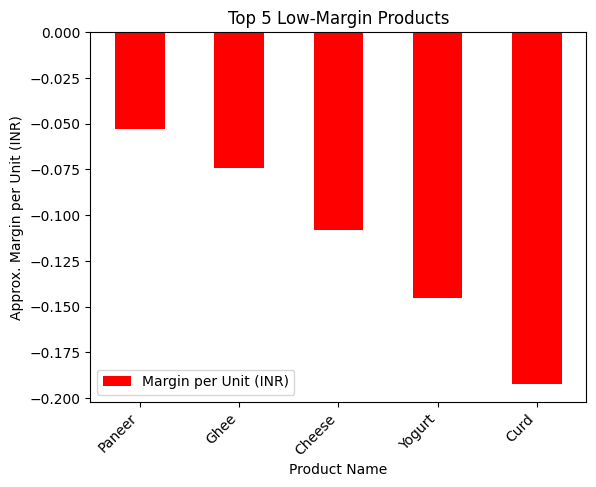

In [31]:
# Top 5 Low-Margin Products
low_margin = product_margin.tail(5)

plt.figure(figsize=(5,5))
low_margin.plot(kind="bar", color="red")
plt.title("Top 5 Low-Margin Products")
plt.ylabel("Approx. Margin per Unit (INR)")
plt.xticks(rotation=45, ha="right")
plt.show()

**Insights**: Butter, Ice Cream, Milk, Lassi, and Buttermilk are high-margin products, offering better profitability and should be prioritized for sales and promotions. Paneer, Ghee, Cheese, Yogurt, and Curd are low-margin products, indicating lower profitability and potential need for cost review or targeted marketing.

### 4.4 Assess Shelf Life & Wastage Risks  

This analysis evaluates how quickly products are sold relative to their shelf life, identifying items that may expire before being purchased.  
It highlights slow-moving products and estimates which items are at highest risk of wastage, supporting better inventory and production planning.

This includes:
- 4.4.1 Compare product shelf life with actual sales velocity.
- 4.4.2 Highlight products likely to expire before being sold.


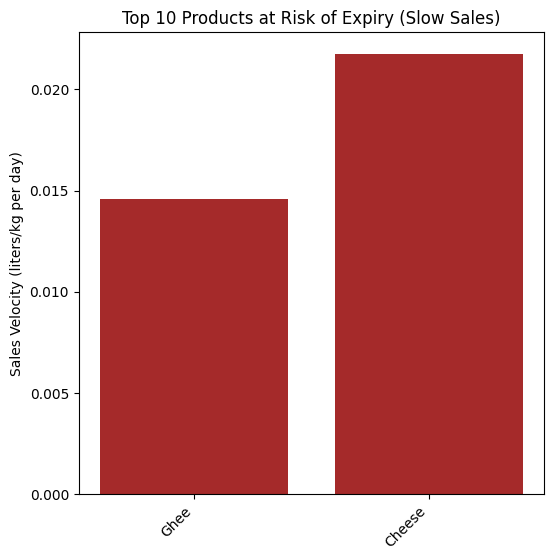

In [22]:
#4.4.1 Compare product shelf life with actual sales velocity
# Sales Velocity = Quantity Sold per day of shelf life
clean_df["Sales Velocity"] = clean_df["Quantity Sold (liters/kg)"] / clean_df["Shelf Life (days)"]

# Top 10 slow-moving products (risk of expiry)
low_velocity = clean_df.sort_values(by="Sales Velocity").head(10)

# Visualization
plt.figure(figsize=(6,6))
plt.bar(low_velocity["Product Name"], low_velocity["Sales Velocity"], color="brown")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sales Velocity (liters/kg per day)")
plt.title("Top 10 Products at Risk of Expiry (Slow Sales)")
plt.show()

**Insights**: Products like Ghee and Cheese have very low sales velocity relative to their shelf life, indicating a high risk of expiry before being sold. Monitoring these slow-moving items can help prevent wastage and improve inventory efficiency.

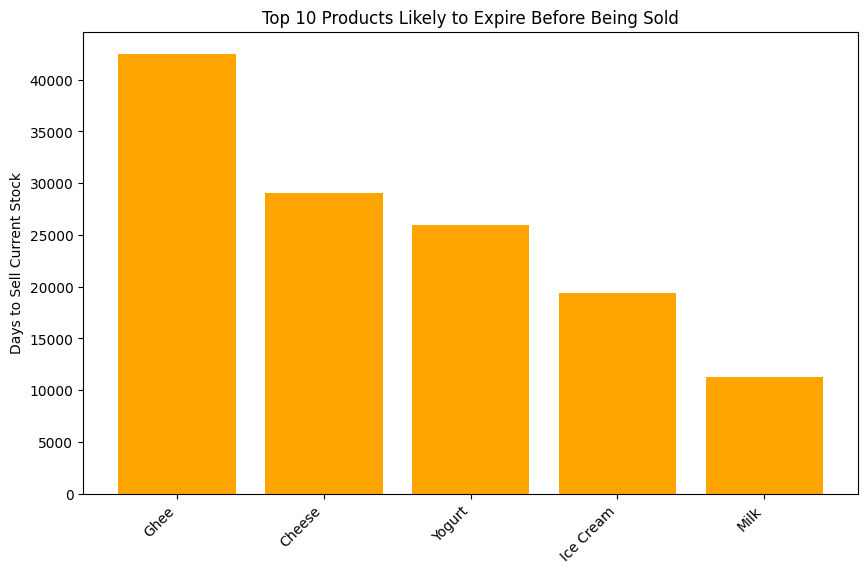

In [23]:
#4.4.2 Highlight products likely to expire before being sold
# Estimate remaining days to sell current stock at current sales velocity
clean_df["Days_to_Sell_Current_Stock"] = clean_df["Quantity in Stock (liters/kg)"] / clean_df["Sales Velocity"]

# Products where Days_to_Sell > Shelf Life (likely to expire)
at_risk_expiry = clean_df[clean_df["Days_to_Sell_Current_Stock"] > clean_df["Shelf Life (days)"]]

# Top 10 highest risk products
at_risk_expiry_top10 = at_risk_expiry.sort_values(by="Days_to_Sell_Current_Stock", ascending=False).head(10)

# Visualization
plt.figure(figsize=(10,6))
plt.bar(at_risk_expiry_top10["Product Name"], at_risk_expiry_top10["Days_to_Sell_Current_Stock"], color="orange")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Days to Sell Current Stock")
plt.title("Top 10 Products Likely to Expire Before Being Sold")
plt.show()

**Insights**: Products like Ghee, Cheese, Yogurt, Ice Cream, and Milk are at high risk of expiring before being sold due to extremely slow sales relative to current stock. Focusing on better inventory planning and targeted promotions for these items can help reduce wastage and optimize stock turnover.

## Step 5. Share
### 5.1 Insights
- Butter, Ice Cream, and Milk contribute roughly 13–14% each of total revenue, making them the top-performing products.  
- Amul and Mother Dairy account for nearly 50% of total revenue, highlighting their market dominance.  
- Retail and Wholesale channels drive around 35% and 34% of sales respectively, while Online contributes 31%, showing growth potential.  
- Slow-moving products like Ghee, Yogurt, and Cheese have low sales velocity relative to stock, indicating a high risk of expiry.  
- High-margin products such as Butter, Ice Cream, and Milk (11–18% margin) outperform low-margin products like Curd, Yogurt, and Cheese (-15% to -19% margin).  
- Monthly revenue peaks in January, June, and December, suggesting seasonal demand fluctuations.

### 5.2 Recommendations

- Prioritize production, marketing, and promotions for top revenue and high-margin products.  
- Strengthen partnerships with leading brands and focus on Retail and Wholesale channels, while expanding Online presence.  
- Monitor and promote slow-moving or at-risk inventory to reduce wastage.  
- Review pricing and cost strategies for low-margin products to improve profitability.  
- Adjust production and marketing strategies according to seasonal sales trends to optimize revenue and stock levels.